This code reads the excel file created with tdms_file_reader.ipynb and modified manually adding the information about Z thresholds, target frequency and if the tdms file is the google drive spreadsheet, then you select a tdms file and it analyses the encoder data, retrieving the frequencies for A, B and Z encoders and saving the results in a folder named as the tdms file. The last cell creates a result summary .txt file in the same folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import lib_bbmdev
import logging
from datetime import datetime
import sys
from pathlib import Path

%matplotlib inline

In [3]:
#initialize
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
path = "Data/2023_run2/"
excel_file = "tdms_dataframe_xlsx.xlsx"
df_excel = pd.read_excel(path+excel_file, header=1)
df_stable = df_excel.dropna()
df_stable.set_index("File", inplace = True)
df_stable

,0,Iu,Iv,Iw,A,B,Z,H,SV1,SV2,...,Count,Vu,Vv,Vw,Duration [s],Sampling Frequency [Hz],Low TH,High TH,Target freq [Hz],Is in Spreadsheet?
File,,,,,,,,,,,,,,,,,,,,,
tdms103_room-to-cryo.tdms,4,1,1,1,1,1,1,1,0,0,...,1,1,1,1,9348.000,1000,-0.5,0.5,1.0,Y
tdms104_room-to-cryo.tdms,5,1,1,1,1,1,1,1,0,0,...,1,1,1,1,15217.000,1000,-0.5,0.5,0.8,Y
tdms35_room-to-cryo.tdms,7,1,1,1,1,1,1,1,1,1,...,0,1,1,1,9959.000,1000,-8.0,-0.5,1.0,Y
tdms56_room-to-cryo.tdms,12,1,1,1,1,1,1,1,1,1,...,0,1,1,1,8452.000,1000,-8.0,-0.5,1.0,Y
tdms58_room-to-cryo.tdms,13,1,1,1,1,1,1,1,1,1,...,0,1,1,1,3648.000,1000,-8.0,-0.5,1.0,Y
tdms61_room-to-cryo.tdms,14,1,1,1,1,1,1,1,1,1,...,0,1,1,1,2105.000,1000,-8.0,-0.5,1.0,Y
tdms64_room-to-cryo.tdms,17,1,1,1,1,1,1,1,1,1,...,0,1,1,1,21744.009,1000,-8.0,-0.5,1.0,Y
tdms75_room-to-cryo.tdms,23,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11302.000,1000,-0.5,0.5,1.0,Y
tdms88_room-to-cryo.tdms,29,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11054.000,1000,-0.5,0.5,1.0,Y


In [4]:
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
filename = "tdms103_room-to-cryo.tdms"




created_directory = lib_bbmdev.create_directory('C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/'+filename+'_encoder')

df_signal = lib_bbmdev.tdms_load_selected_custom(path + 'tdms/'+filename , samplerate=1000, print_=True)
os.chdir(created_directory)
df_signal

Directory 'C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/tdms103_room-to-cryo.tdms_encoder' already exists.


,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
0,0.000,-0.001192,0.005260,0.007852,1.104498,-10.375581,-0.898934,0.112319,-10.380818,0.002865,0.002850,0.008128
1,0.001,-0.000872,0.004944,0.007214,1.104817,-10.375581,-0.947625,0.112002,-10.380818,-0.012568,-0.012584,0.002983
2,0.002,-0.000872,0.004312,0.007533,1.104179,-10.375581,-0.977540,0.114533,-10.380818,0.002865,-0.002294,-0.002161
3,0.003,-0.001511,0.005576,0.007214,1.105135,-10.375581,-0.977222,0.113268,-10.380818,0.002865,-0.002294,0.002983
4,0.004,-0.000872,0.004312,0.007214,1.104817,-10.375581,-0.939669,0.112951,-10.380818,-0.002279,-0.002294,0.002983
...,...,...,...,...,...,...,...,...,...,...,...,...
9347995,9347.995,-0.001192,0.005260,0.004026,1.092379,0.532175,-0.539319,0.111054,0.000360,-0.002279,0.007995,0.002983
9347996,9347.996,-0.001192,0.004628,0.004026,1.092061,0.530911,-0.535819,0.111370,-0.001222,-0.002279,0.002850,-0.007306
9347997,9347.997,-0.000872,0.004944,0.004026,1.092061,0.528068,-0.538365,0.111054,-0.000905,-0.007424,0.002850,-0.007306
9347998,9347.998,-0.000872,0.004628,0.004664,1.092379,0.530595,-0.553004,0.111686,-0.000905,-0.007424,-0.002294,-0.007306


In [ ]:
# ログの設定
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# ログのフォーマットを設定
formatter = logging.Formatter('%(asctime)s - %(message)s')

# ログのファイル出力先を設定
log_file = 'analysis.log'
file_handler = logging.FileHandler(log_file)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# 解析開始時刻
start_time = datetime.now()

Stability zone goes from index 7281304 to index 8820001.
1.004363069 1.0981196690000001
0.188178319 1.0972895930000002
-1.6856306620000001 1.096449644
[[0.95414491555, 1.1530256524500002], [0.17876940305, 1.1521540726500001], [-1.7699121951, 1.1512721262]]


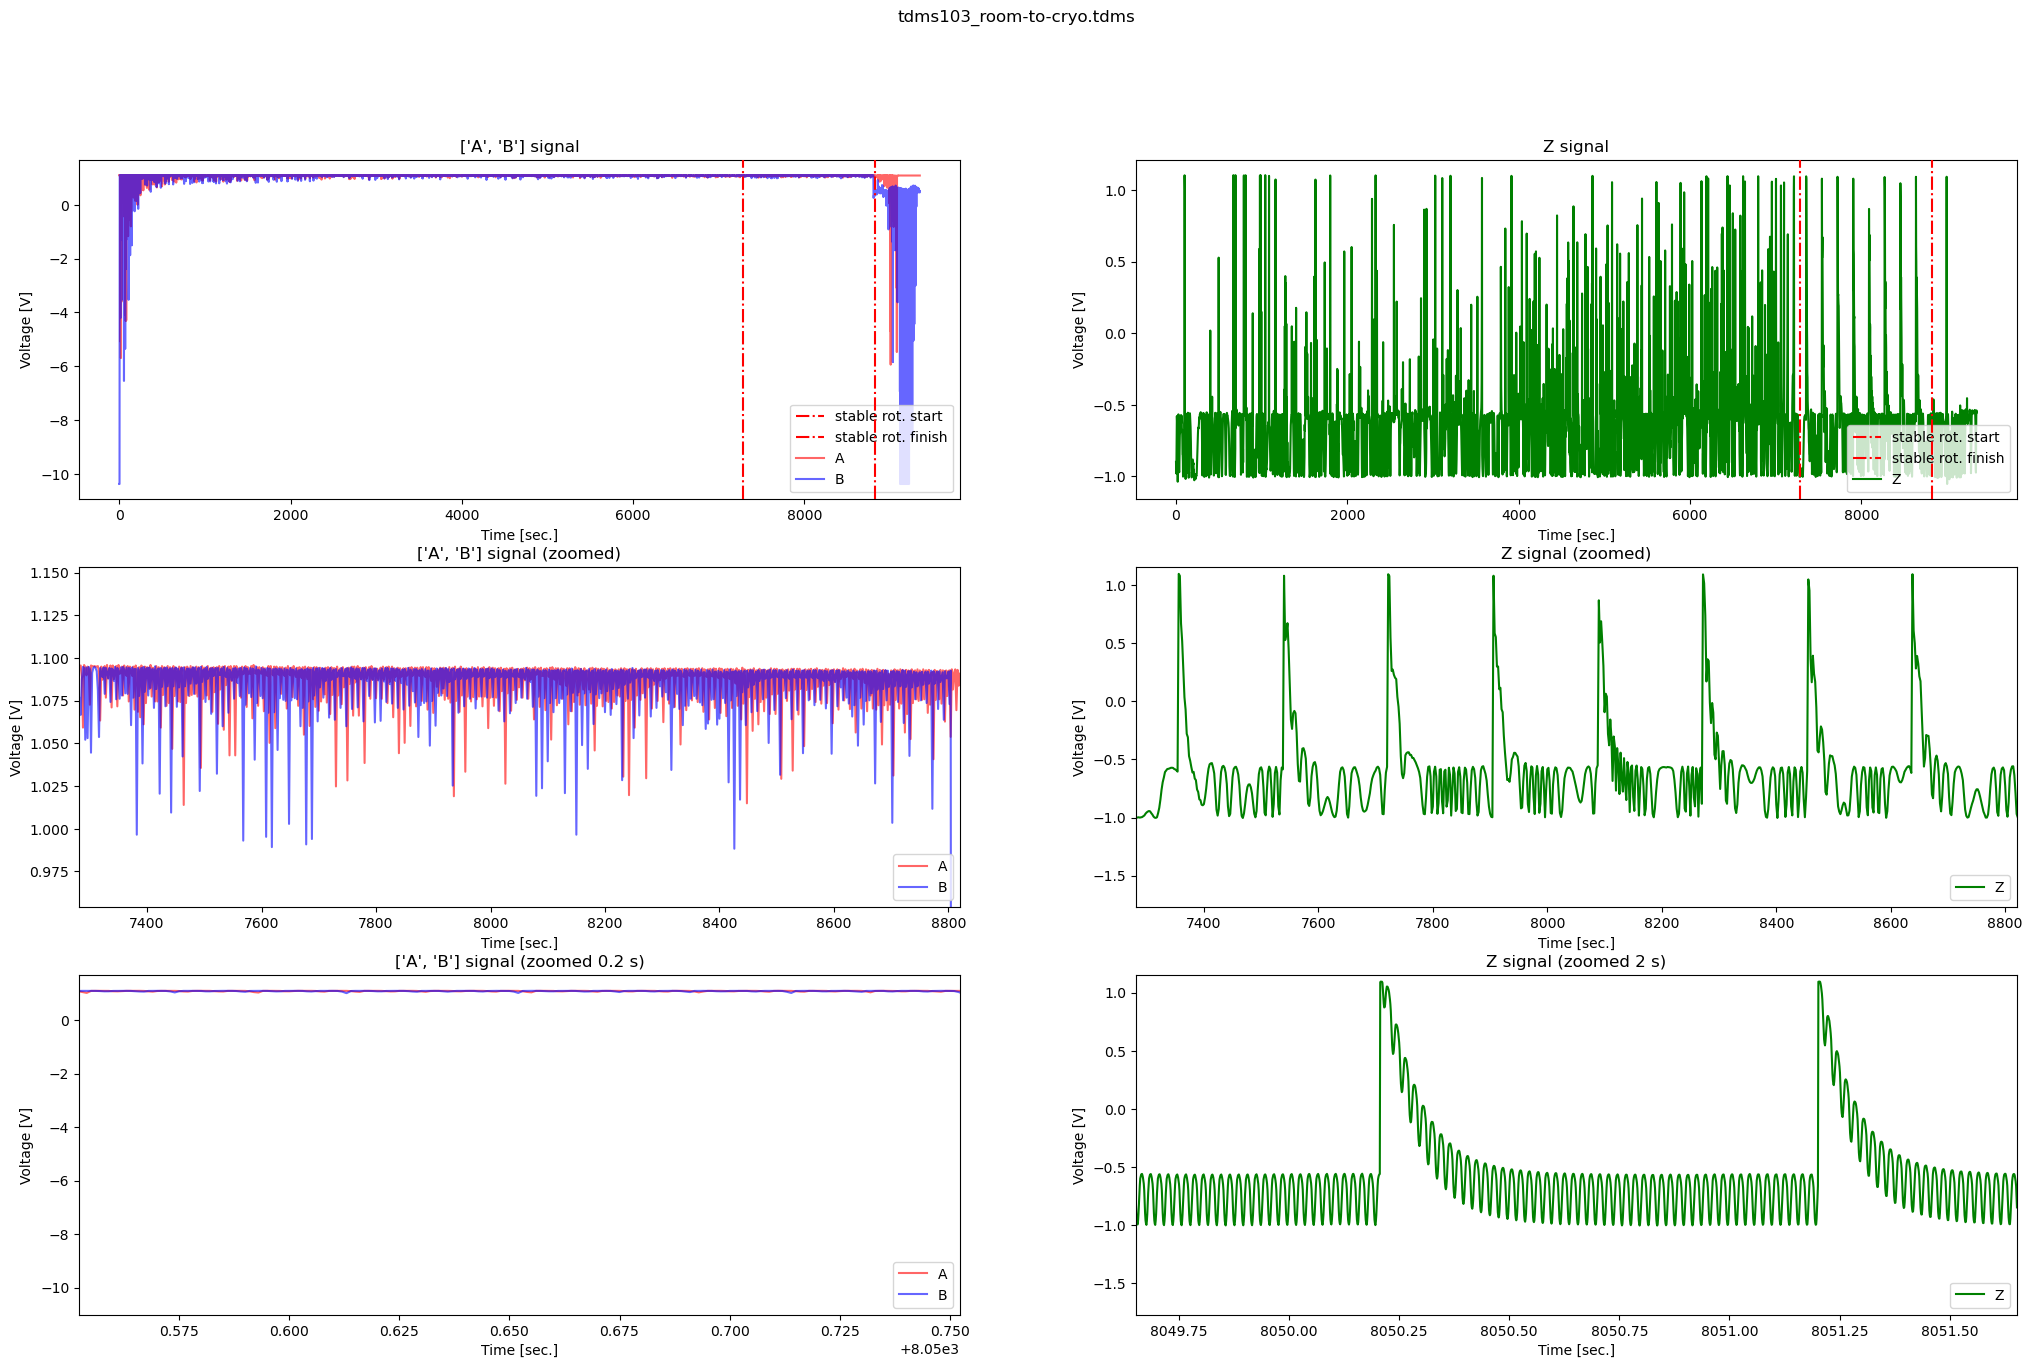

In [5]:
#%%time
#frequency
#encorder_threshold_high = 0.
#encorder_threshold_low = -4.
low_th, high_th, target_freq = df_stable.loc[filename, ['Low TH', 'High TH', 'Target freq [Hz]']]
threshold,time_stamps=lib_bbmdev.triggerd_window(df_signal['Z'].to_numpy(),df_signal['time'].to_numpy(),high_threshold=high_th,low_threshold=low_th,window_size=2)
period,freq=lib_bbmdev.time2freq(time_stamps)

try:
    if target_freq == 0.8:
        stable_index = np.where((freq>0.955*target_freq)&(freq<1.01*target_freq))[0]
    else:
        stable_index = np.where((freq>target_freq)&(freq<1.01*target_freq))[0]
    stable_str = time_stamps[1:][stable_index[0]]
    stable_fin = time_stamps[1:][stable_index[-1]]
except:
    stable_str = np.inf
    stable_fin = np.inf



limA, limB, limZ = lib_bbmdev.stability_zone_zoom([df_signal['A'],df_signal['B'],df_signal['Z']], df_signal['time'], stable_str, stable_fin, margin = 0.05, print_=True)
start, fin = lib_bbmdev.stability_zone_start_end(df_signal['time'], stable_str, stable_fin, print_ = False)

sr = 2000
sec_windowAB, sec_windowZ = 0.2, 2
y_data = df_signal['A'][::sr], df_signal['B'][::sr], df_signal['Z'][::sr]

y_data_zoom = df_signal['A'][::], df_signal['B'][::], df_signal['Z'][::]

x_data = df_signal['time'][::sr]
x_data_zoom = df_signal['time'][::]
fig, axs = plt.subplots(3,2, figsize=(25,15))
plot_data = list(y_data)
plot_data_zoom = list(y_data_zoom)
plot_labels = ["A", "B", "Z"]
plot_col = ["r", "b", "g"]

#first row
# Call the function with common time_data, multiple data arrays, and specified colors
axs[0,0].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,0].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[0,0], "Time [sec.]", "Voltage [V]")
axs[0,0].autoscale(enable=True, axis="x", tight=False)
axs[0,0].autoscale(enable=True, axis="y", tight=False)
axs[0,0].set_title(f'{plot_labels[0:2]} signal')
axs[0,0].legend(loc="lower right")

axs[0,1].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,1].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[0,1], "Time [sec.]", "Voltage [V]")
axs[0,1].autoscale(enable=True, axis="x", tight=False)
axs[0,1].autoscale(enable=True, axis="y", tight=False)
axs[0,1].set_title(f'{plot_labels[2]} signal')
axs[0,1].legend(loc="lower right")


#second row 

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[1,0], "Time [sec.]", "Voltage [V]")
axs[1,0].autoscale(enable=True, axis="x", tight=False)
axs[1,0].autoscale(enable=True, axis="y", tight=False)
axs[1,0].set_ylim(limA)
axs[1,0].set_title(f'{plot_labels[0:2]} signal (zoomed)')
axs[1,0].set_xlim(stable_str, stable_fin)
axs[1,0].legend(loc="lower right")

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[1,1], "Time [sec.]", "Voltage [V]")
axs[1,1].autoscale(enable=True, axis="x", tight=False)
axs[1,1].autoscale(enable=True, axis="y", tight=False)
axs[1,1].set_ylim(limZ)
axs[1,1].set_title(f'{plot_labels[2]} signal (zoomed)')
axs[1,1].set_xlim(stable_str, stable_fin)
axs[1,1].legend(loc="lower right")


#third row

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,0],
    x_data_zoom,
    plot_data_zoom[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha= 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[2,0], "Time [sec.]", "Voltage [V]")
axs[2,0].autoscale(enable=True, axis="x", tight=False)
axs[2,0].autoscale(enable=True, axis="y", tight=False)
#axs[2,0].set_ylim(1.01,1.1)
axs[2,0].set_title(f'{plot_labels[0:2]} signal (zoomed {sec_windowAB} s)')
axs[2,0].set_xlim((stable_fin+stable_str)/2 - sec_windowAB/2, (stable_fin+stable_str)/2 + sec_windowAB/2)
axs[2,0].legend(loc="lower right")


lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,1],
    x_data_zoom,
    [plot_data_zoom[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[2,1], "Time [sec.]", "Voltage [V]")
axs[2,1].autoscale(enable=True, axis="x", tight=False)
axs[2,1].autoscale(enable=True, axis="y", tight=False)
axs[2,1].set_ylim(limZ)
axs[2,1].set_title(f'{plot_labels[2]} signal (zoomed {sec_windowZ} s)')
axs[2,1].set_xlim((stable_fin+stable_str)/2 - sec_windowZ/2, (stable_fin+stable_str)/2 + sec_windowZ/2)
axs[2,1].legend(loc="lower right")

fig.suptitle(filename)
#plt.savefig(
           #"./" + "encoder.jpg",
           #dpi=130,
       #)
plt.show()

In [6]:
low_thA, high_thA = 1.07, 1.082 #these have to be determined manually
low_thB, high_thB = 1.07, 1.082
period_accumZ, periodZ, time_stampsZ, time_diffZ = lib_bbmdev.freq_calc(df_signal['time'].to_numpy(), df_signal['Z'].to_numpy(), high_th, low_th)

period_accumB, periodB, time_stampsB, time_diffB = lib_bbmdev.freq_calc(df_signal['time'][start:fin].to_numpy(), df_signal['B'][start:fin].to_numpy(), 
                                                         high_thB, low_thB)
period_accumA, periodA, time_stampsA, time_diffA = lib_bbmdev.freq_calc(df_signal['time'][start:fin].to_numpy(), df_signal['A'][start:fin].to_numpy(), 
                                                         high_thA, low_thA)

Calculating rotation frequency...: 100%|██████████| 1538696/1538696 [00:01<00:00, 1351604.22it/s]


In [7]:
periodoA,freqA=lib_bbmdev.time2freq(time_stampsA)
target_freqA = target_freq*128
try:
    if target_freqA == 0.8*128:
        stable_indexA = np.where((freqA>0.955*target_freqA)&(freqA<1.01*target_freqA))[0]
    else:
        stable_indexA = np.where((freqA>target_freqA)&(freqA<1.01*target_freqA))[0]
    stable_strA = time_stampsA[1:][stable_indexA[0]]
    stable_finA = time_stampsA[1:][stable_indexA[-1]]
except:
    stable_strA = np.inf
    stable_finA = np.inf


periodoB,freqB=lib_bbmdev.time2freq(time_stampsB)
target_freqB = target_freq*128
try:
    if target_freqB == 0.8*128:
        stable_indexB = np.where((freqB>0.955*target_freqB)&(freqB<1.01*target_freqB))[0]
    else:
        stable_indexB = np.where((freqB>target_freqB)&(freqB<1.01*target_freqB))[0]
    stable_strB = time_stampsB[1:][stable_indexB[0]]
    stable_finB = time_stampsB[1:][stable_indexB[-1]]
except:
    stable_strB = np.inf
    stable_finB = np.inf


periodoZ,freqZ=lib_bbmdev.time2freq(time_stampsZ)
target_freqZ = target_freq
try:
    if target_freqZ == 0.8:
        stable_indexZ = np.where((freqZ>0.955*target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    else:
        stable_indexZ = np.where((freqZ>target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    stable_strZ = time_stampsZ[1:][stable_indexZ[0]]
    stable_finZ = time_stampsZ[1:][stable_indexZ[-1]]
except:
    stable_strZ = np.inf
    stable_finZ = np.inf



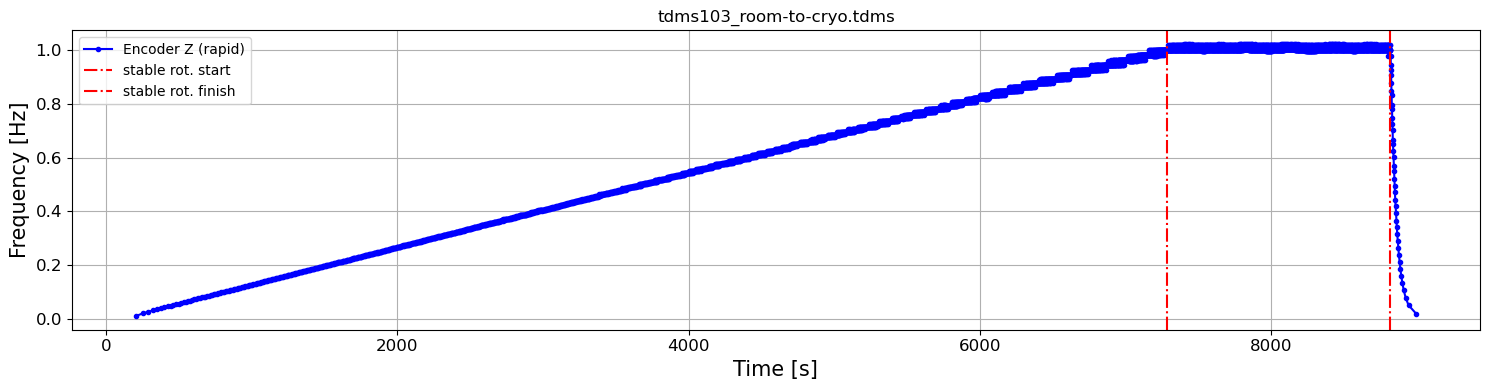

In [8]:
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(111)
ax.plot(time_stampsZ[1:],freqZ,'b.-',label = 'Encoder Z (rapid)') # frequency
ax.axvline(x = stable_strZ,c = 'r',ls='-.',label = 'stable rot. start') # vertical line at the start
ax.axvline(x = stable_finZ,c = 'r',ls='-.',label = 'stable rot. finish') # vertical line at the finish
ax.grid()
ax.set_xlabel('Time [s]',fontsize = 15)
ax.set_ylabel(r'Frequency [Hz]', fontsize = 15)
ax.tick_params(labelsize = 12)
ax.legend()
#ax.set_ylim(0,1.1)
#ax.set_ylim(0.2,0.27)
#ax.set_xlim(2100,2900)
ax.set_title(filename)
plt.tight_layout()
#plt.savefig(
           #"./" + "frequency_Z.jpg",
           #dpi=130,
       #)
plt.show()

In [20]:
np.where(np.array(time_stampsZ) > 2000)[0][0]

256

In [22]:

freqZ[np.where(np.array(time_stampsZ) > 2000)[0][0]]

0.2670487612348216

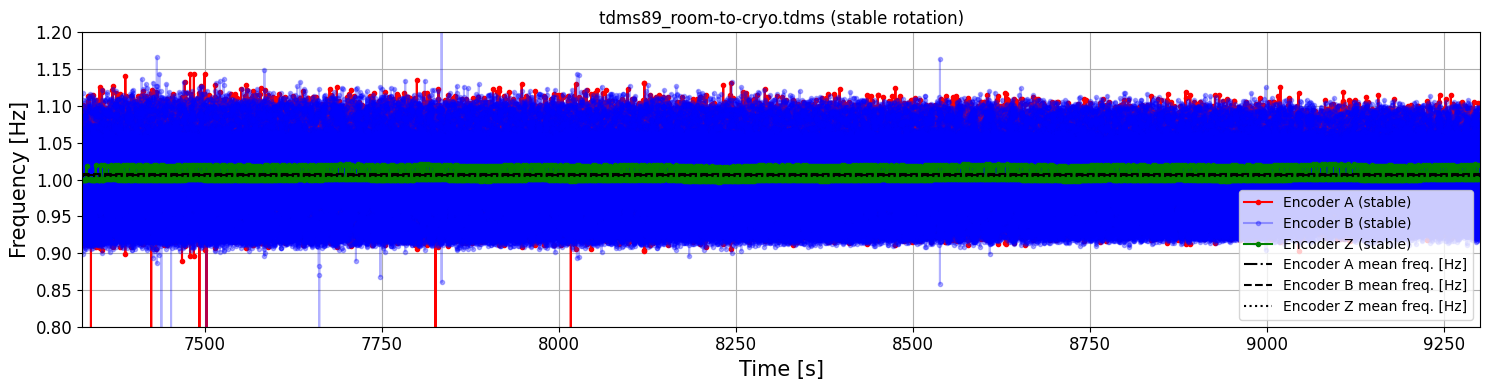

In [ ]:
#plot frequencies 
lower_limits, upper_limits= [], []
for i in [stable_strZ,stable_strA, stable_strB]:
    if i != np.inf:
        lower_limits.append(i)
for i in [stable_finZ,stable_finA, stable_finB]:
    if i != np.inf:
        upper_limits.append(i)
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(111)
ax.plot(time_stampsA[1:],freqA/128,'r.-',alpha=1,label = 'Encoder A (stable)') # frequency
ax.plot(time_stampsB[1:],freqB/128,'b.-', alpha = 0.3,label = 'Encoder B (stable)') # frequency
#ax.plot(time_stamps[1:],freq,'g.-',label = 'Encoder Z (stable)') # frequency
ax.plot(time_stampsZ[1:],freqZ,'g.-',label = 'Encoder Z (stable)') # frequency
#ax.axvline(x = stable_strZ,c = 'r',ls='-.',label = 'stable rot. start') # vertical line at the start
#ax.axvline(x = stable_finZ,c = 'r',ls='-.',label = 'stable rot. finish') # vertical line at the finish
ax.axhline(y = np.mean(freqA/128),c = 'k',ls='-.',label = 'Encoder A mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqB/128),c = 'k',ls='--',label = 'Encoder B mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqZ[stable_index]),c = 'k',ls=':',label = 'Encoder Z mean freq. [Hz]') # vertical line at the finish
ax.grid()
ax.set_xlabel('Time [s]',fontsize = 15)
ax.set_ylabel(r'Frequency [Hz]', fontsize = 15)
ax.tick_params(labelsize = 12)
ax.legend()
#ax.set_ylim(0,1.1)
ax.set_ylim(0.8,1.2)
ax.set_xlim([np.max(lower_limits), np.min(upper_limits)]) #this defines where all three encoders are stable
ax.set_title(f'{filename} (stable rotation)')
plt.tight_layout()
#plt.savefig(
           #"./" + "frequency.jpg",
           #dpi=130,
       #)
plt.show()

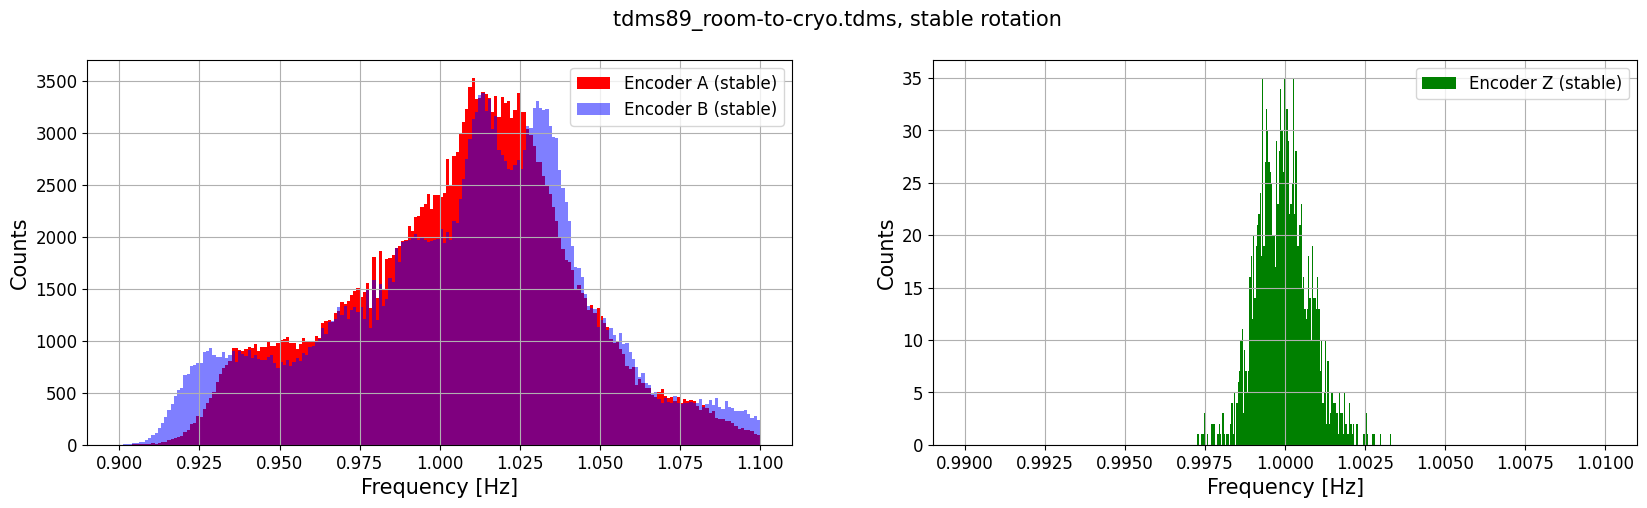

In [ ]:
fig = plt.figure(figsize=(20,5))
fig.suptitle(f'{filename}, stable rotation',fontsize=15)
plt.subplot(121)
plt.hist(freqA/128, bins=200,range=[0.9,1.1], color = 'r', label = 'Encoder A (stable)')
plt.hist(freqB/128, bins=200,range=[0.9,1.1], color = 'b', label = 'Encoder B (stable)', alpha = 0.5)
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(122)
plt.hist(freqZ[stable_index], bins=500,range=[0.99,1.01], color = 'g', label = 'Encoder Z (stable)')
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig(
           #"./" + "frequency_hist.jpg",
           #dpi=130,
       #)
plt.show()


In [ ]:
np.mean(freqA)/128, np.mean(freqB)/128, np.mean(freqZ[stable_index]), np.std(freqA/128), np.std(freqB)/128, np.std(freqZ[stable_index])

(1.0066843128521463,
 1.0070214493150769,
 1.0054538274082252,
 0.03596296551791725,
 0.04020914941943724,
 0.008723266248756169)

In [ ]:
report = open("results.txt", "w")
report.write("Encoder, Mean Frequency [Hz], Std. Dev. [Hz], Low TH, High TH")
report.write('\n')
report.write(f'A, {np.mean(freqA)/128}, {np.std(freqA)/128}, {low_thA}, {high_thA}')
#report.write(f'A, -, -, -, -')
report.write('\n')
report.write(f'B, {np.mean(freqB)/128}, {np.std(freqB)/128}, {low_thB}, {high_thB}')
#report.write(f'B, -, -, -, -')
report.write('\n')
report.write(f'Z, {np.mean(freqZ[stable_index])}, {np.std(freqZ[stable_index])}, {low_th}, {high_th}')
report.close()